Dataset:
   StudyHours Attendance Result
0        Low       Poor   Fail
1       High       Good   Pass
2       High       Poor   Pass
3        Low       Good   Fail
4       High       Good   Pass 



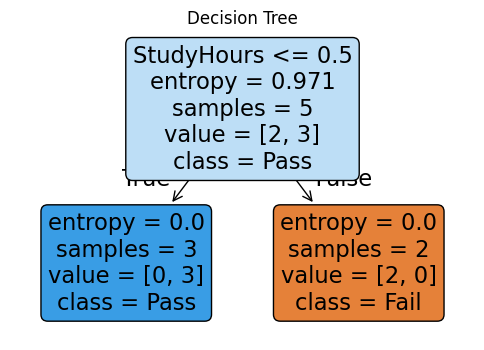

Prediction for StudyHours=Low & Attendance=Good → Fail


In [1]:
# ===== LAB 3 - Q2: Decision Tree using scikit-learn =====
!pip install numpy pandas scikit-learn matplotlib --quiet

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Dataset
df = pd.DataFrame({
    "StudyHours": ["Low","High","High","Low","High"],
    "Attendance": ["Poor","Good","Poor","Good","Good"],
    "Result": ["Fail","Pass","Pass","Fail","Pass"]
})
print("Dataset:\n", df, "\n")

# Encode
le_sh = LabelEncoder()
le_att = LabelEncoder()
le_res = LabelEncoder()

X = pd.DataFrame({
    "StudyHours": le_sh.fit_transform(df["StudyHours"]),
    "Attendance": le_att.fit_transform(df["Attendance"])
})
y = le_res.fit_transform(df["Result"])

# Train Decision Tree
clf = DecisionTreeClassifier(criterion='entropy', random_state=1)
clf.fit(X, y)

# Visualize
plt.figure(figsize=(6,4))
plot_tree(clf, feature_names=["StudyHours","Attendance"], class_names=le_res.classes_, filled=True, rounded=True)
plt.title("Decision Tree")
plt.show()

# Prediction
sample = pd.DataFrame({
    "StudyHours": [le_sh.transform(["Low"])[0]],
    "Attendance": [le_att.transform(["Good"])[0]]
})
pred = clf.predict(sample)
print("Prediction for StudyHours=Low & Attendance=Good →", le_res.inverse_transform(pred)[0])